# K-Nearest Neighbors From Scratch

Implementing KNN classifier.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## KNN Class

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def predict(self, X):
        return np.array([self._predict_point(x) for x in X])
    
    def _predict_point(self, x):
        # Calculate distances
        distances = [self._euclidean_distance(x, x_train) 
                    for x_train in self.X_train]
        
        # Get K nearest
        k_indices = np.argsort(distances)[:self.k]
        k_labels = self.y_train[k_indices]
        
        # Majority vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

print('KNN class ready')

KNN class ready


---
## Test on Iris

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (120, 4), Test: (30, 4)


In [4]:
# Our KNN
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = np.mean(y_pred == y_test)
print('='*50)
print('OUR K-NN')
print('='*50)
print(f'K={knn.k}')
print(f'Accuracy: {acc*100:.2f}%')

OUR K-NN
K=5
Accuracy: 100.00%


In [5]:
# sklearn KNN
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train, y_train)
y_pred_sk = sklearn_knn.predict(X_test)

acc_sk = np.mean(y_pred_sk == y_test)
print('='*50)
print('SKLEARN K-NN')
print('='*50)
print(f'Accuracy: {acc_sk*100:.2f}%')
print(f'\nDifference: {abs(acc - acc_sk)*100:.2f}%')

SKLEARN K-NN
Accuracy: 100.00%

Difference: 0.00%


---
## Effect of K

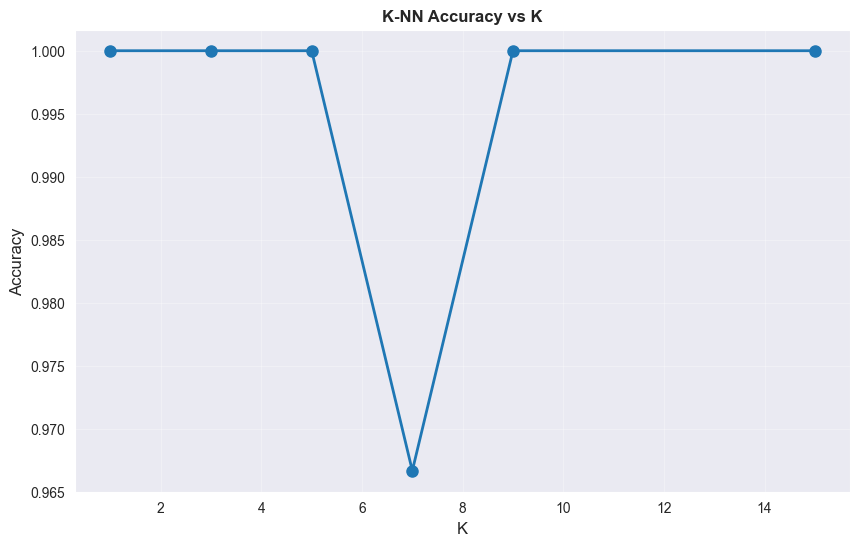

Best K: 1 with 100.00% accuracy


In [6]:
k_values = [1, 3, 5, 7, 9, 15]
accuracies = []

for k in k_values:
    knn_temp = KNN(k=k)
    knn_temp.fit(X_train, y_train)
    pred = knn_temp.predict(X_test)
    accuracies.append(np.mean(pred == y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('K-NN Accuracy vs K', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f'Best K: {k_values[np.argmax(accuracies)]} with {max(accuracies)*100:.2f}% accuracy')

---
## Summary

**Key Points:**
- K-NN stores all training data
- Classifies by majority vote of K nearest neighbors
- Simple but slow for large datasets
- K controls bias-variance tradeoff

**Key Point:** "K-NN is a lazy learner that makes predictions by finding K nearest training examples and taking majority vote. It's simple and effective but computationally expensive for predictions."